In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from js import fetch
import io

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(url)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df = pd.read_csv(boston_url)

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Generate Descriptive Statistics and Visualizations

For the "Median value of owner-occupied homes" provide a boxplot

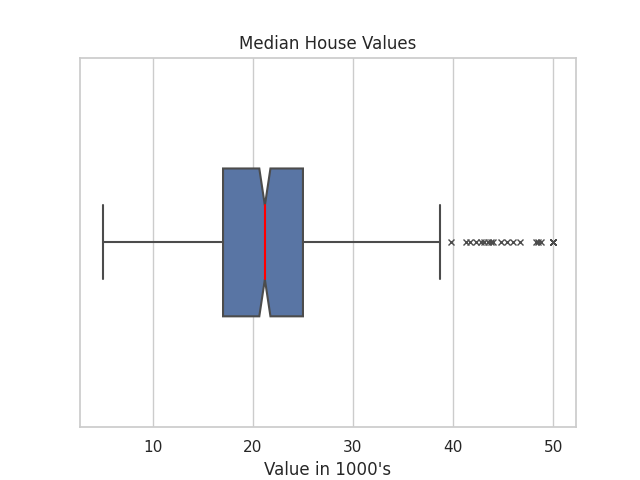

Median Value:  count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


In [6]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=boston_df['MEDV'],data=boston_df, notch=True, flierprops={"marker": "x"}, width = 0.4, whis=1.8, medianprops={"color": "red"} )
Med_stats=boston_df['MEDV'].describe()
ax.set_title("Median House Values")
ax.set_xlabel("Value in 1000's")
plt.show()
print("Median Value: ", Med_stats)

* Median house values for Boston owner-occupied homes is 21,200 dollars and the more expensive homes, the outliers, range from 40,000 to 50,000 dollars.

Provide a  bar plot for the Charles river variable

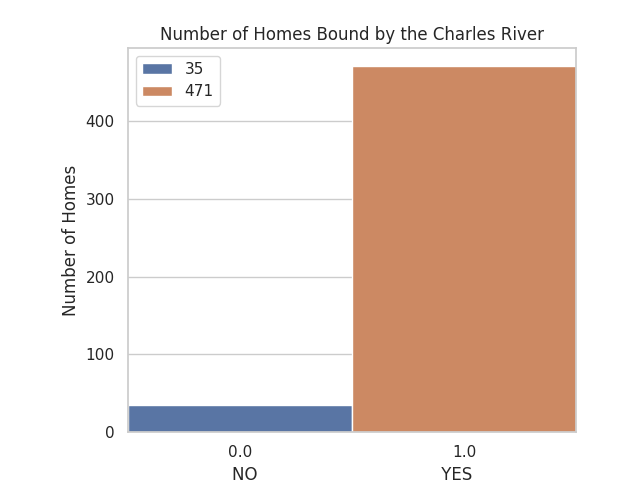

In [7]:
Y= [boston_df['CHAS'].value_counts()[1], boston_df['CHAS'].value_counts()[0]]
X = boston_df['CHAS'].unique()
ax=sns.barplot(data=boston_df,y=Y, x=X , hue=Y, width=1, dodge=False)
ax.set_title("Number of Homes Bound by the Charles River")
ax.set_xlabel("NO                                   YES")
ax.set_ylabel("Number of Homes")
plt.subplots_adjust(top=.9, bottom=.1, left=.2)
plt.show()

* 471 homes are bound by the Charles River, while 35 of them are not. We don't know how much the price is affected by this until we see how exactly these 35 homes are priced.

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

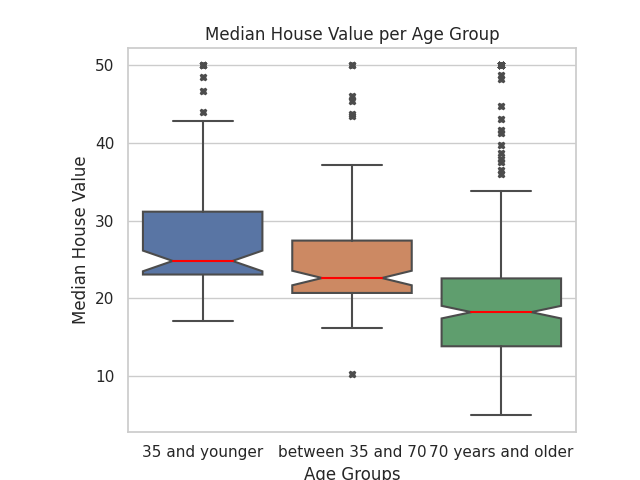

In [8]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE']>=70), 'age_group'] = '70 years and older'

ax=sns.boxplot(x='age_group', y='MEDV', data=boston_df, order=['35 and younger','between 35 and 70','70 years and older'], notch=True, flierprops={"marker":"X"},  medianprops={"color": "red"})
ax.set_title("Median House Value per Age Group")
ax.set_xlabel("Age Groups")
ax.set_ylabel("Median House Value")
plt.show()

* We can see that the younger generations have a higher median house value, while the oldest generations have a much lower median house value.
    * Youngest age group: 25,000 dollars median house value
    * Medium age group: 22,000 dollars median house value
    * Oldest age group: 18,000 dollars median house value
    

* The youngest and medium aged groups' lowest house minimum value is around 18,000 dollars, with the exception of one outlier for the medium aged group. The oldest age group's lowest evaluation is at 5,000 dollars.
    * The lowest house value for the younger generations is about the value of the oldest age group's median house evaluation

* All three group have a maximum priced home value at 50,000 dollars.

* The outliers for the youngest and medium aged home owners, begin at around 42,000 and up. Where as the oldest aged group's outliers begin at around 35,000 dollars.

* One thing to note, is that the median house evaluation is at the lower end of the concentration group for the younger and medium aged group. where as the Oldest age group has nice and evenly dispered quartiles throughout.

* So more people have lower evaluations within their group when it comes to the younger and medium aged groups. The oldest group has a more disperesed evaluation throughout its age group.


Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

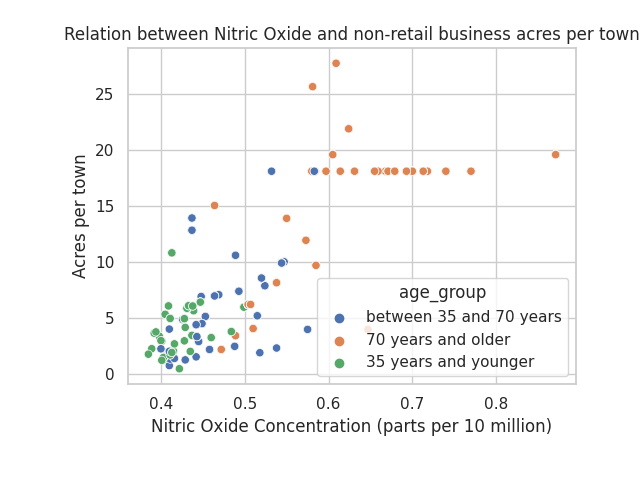

In [30]:
ax=sns.scatterplot(x='NOX', y='INDUS', data=boston_df, hue='age_group')
ax.set_title("Relation between Nitric Oxide and non-retail business acres per town")
ax.set_xlabel("Nitric Oxide Concentration (parts per 10 million)")
ax.set_ylabel("Acres per town")
plt.subplots_adjust(top=.9, bottom=.2, left=.2)
plt.show()

* There is a positive correlation between Nitrus Oxide concentrations and the proportion of non-retail business acres per town.
* I included age into the scatterplot and it shows how the older aged group has more non-retail business acres per town, but also is exposed to much higher levels of nitrus oxide concentrations. 
* While the younger and most medium aged groups, are exposed to low levels of nitrus oxide but also have very little non-retail business acres per town.

Create a histogram for the pupil to teacher ratio variable

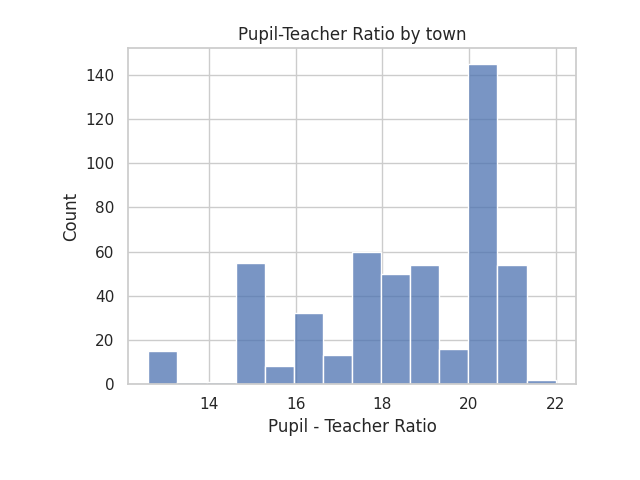

In [14]:
meanratio=boston_df['PTRATIO'].mean()
ax=sns.histplot(x='PTRATIO',data=boston_df)
ax.set_title("Pupil-Teacher Ratio by town")
ax.set_xlabel("Pupil - Teacher Ratio")
plt.show()

* The concentration of pupil to teacher ratio is high for Boston. 
* Which means there are more classes with a high count of students for everyone one teacher.
    * this has been known to affect the learning curve of students, which is why we see this ratio taper off quickly at higher ratios.

## Questions regarding Data Set:

1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [15]:
import scipy.stats

In [36]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],
                      boston_df[boston_df['CHAS']==0]['MEDV'], equal_var=True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

* P-value is less than 0.05 so we reject the null hypothesis that there is no significant difference in value wether the house is bounded by the Charles or not.
* We conclude that there IS a significant difference in value wether the house is bounded by the Charles or not.

2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [19]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70), 'age_group'] = '70 years and older'

In [20]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

* P-Value is greater than 0.05 we know the variances are equal

In [23]:
thirtyfive_lower=   boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy= boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older=      boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [27]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F-Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F-Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


* P-Value is less than 0.05 so we reject the null hypothesis that there is no difference in medium house values for each proportion of owner occupied units built prior to 1940.
* so we conclude that there IS a difference in medium house values for each proportion of owner occupied units built prior to 1940.

3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [29]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['AGE'])

(0.7314701037859608, 7.452392170273296e-86)

* the P-Value is much less than 0.05 so we reject our null hypothesis that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
* So we conclude that there IS a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [33]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [35]:
X=boston_df['DIS']
Y=boston_df['MEDV']

X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
prediction=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.21e-08
Time:                        02:45:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* P-Value < 0.05 so we reject the null hypothesis stating that an additional weighted distance to the five Boston employment centres has NO impact on the median value of owner occupied homes.
* so we conclude that an additional weighted distance to the five Boston employment centres DOES have an impact on the median value of owner occupied homes.
* the impact being that an additional weighted distance to the five Boston employment centres increases value by 1.0916